In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
input_dir = '.\\out\\'
data_input = "cleaned_world_bank_data.pkl"
data = pd.read_pickle(input_dir + data_input)

In [3]:
data.head(5)

SI.POV.DDAY  SI.POV.GINI  EN.POP.SLUM.UR.ZS  SI.SPR.PC40  \
country     year                                                             
Afghanistan 2018          NaN          NaN                NaN          NaN   
            2017          NaN          NaN                NaN          NaN   
            2016          NaN          NaN                NaN          NaN   
            2015          NaN          NaN                NaN          NaN   
            2014          NaN          NaN               62.7          NaN   

                  SE.PRM.UNER  SE.XPD.TOTL.GD.ZS  SL.TLF.TOTL.IN  \
country     year                                                   
Afghanistan 2018          NaN                NaN      13760401.0   
            2017          NaN            3.92675      13285878.0   
            2016          NaN            4.20525      12759869.0   
            2015          NaN            3.24202      12213764.0   
            2014          NaN            3.67390      11611982.0   

                  NY.GDP.MKTP.KD.ZG  SP.URB.TOTL.IN.ZS  EN.POP.SLUM.UR.ZS  
country     year                                                           
Afghanistan 2018                NaN                NaN                NaN  
            2017           2.665292             25.250                NaN  
            2016           2.260314             25.020                NaN  
            2015           1.451315             24.803                NaN  
            2014           2.724543             24.587               62.7

In [4]:
#Create a list of coutries to be plotted in the summary plot below
regions = list(data.index.levels[0])[:50]

### Multicountry plot across all 9 independent variables and the dependent variable (SI.POV.DDAY)

The following plot is a quick illustration of the state of data in across multiple coutries.

One thing that it clearly shows is that there is a strong correlation of location of missing values for many of the variables. However for some others, such as SI.POV.DDAY and SI.POV.GINI this is less the case. 

Secondly, it is clear that we will need a model that is robust to missing values.

A key question here is if these patterns help us know if we have to model each coutry seperately or if one model fits all. IN fact what is the best method to work this out? Maybe there is a middle ground of number of models (for example a different model for every continent.

There are a number of outlier countries that could be investigated as well. For example, in SE.PRM.UNER. What should be done with these? How should our model behave?

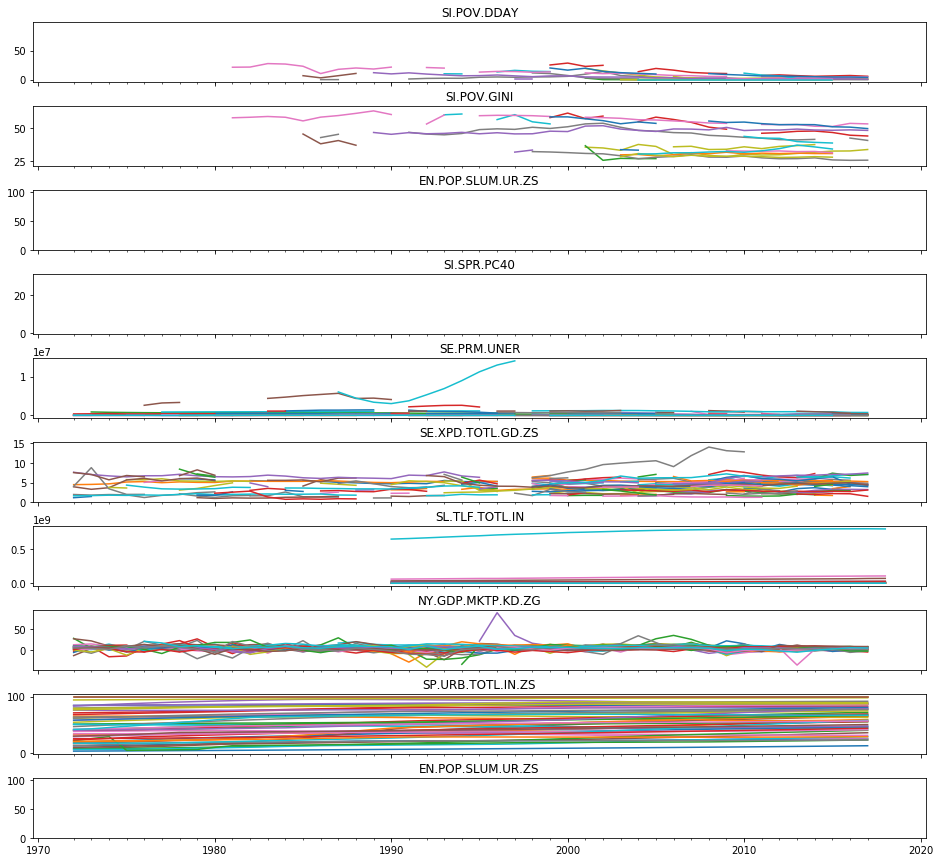

In [5]:
#pyplot.figure(figsize=(16, 20))
inputs = list(data.columns)

fig, axes = plt.subplots(len(inputs), 1, sharex=True ,figsize=(16, 15))

for i in range(len(inputs)):
    axes[i].set_xticks(list(range(1972,2018)), minor=True)
    axes[i].set_title(inputs[i])
    #ax.set_yticklabels([])
    column = inputs[i]
    for country in regions:
        values = data.loc[country][column].values
        axes[i].plot( list(range(1972,2019)), values[::-1])
plt.subplots_adjust(wspace=0, hspace=0.4)
#fig.invert_xaxis()
#pyplot.show()